In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CARNES LA PIEL ROJA
Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques
{'sendero': 'o', 'distancia': 0.95, 'color': 'violet', 'estimate': 0}
['Séptima Brigada', 'CasaToro Ford', 'Los Fundadores', 'Viva centro comercial', 'Universidad Cooperativa de Colombia', 'Polideportivo La Rosita', 'Corporación Universitaria Autónoma de Nariño - AUNAR', 'Clinica de Salud Mental-La Confraternidad', 'Cancha Sintética Sport Light', 'Nuestra Señora de Lourdes', 'Polideportivo Doña Luz', 'Librería & Papelería Popular', 'BTM COMPUTER', 'Megacolegio Silvia Aponte', 'Parque barrio Villa Melida', 'Polideportivo Villamelida', 'Canchas sintéticas Gol de Yepes', 'Lote Kirpas', 'Parque Cavivir', 'cancha Acapulco', 'Polideportivo barrio La Sabana', 'Parque La Carolina', 'Parque Del Barrio Villa Samper', 'Parque Kirpas', 'BARRIO ACAPULCO', 'Parque Las Malocas - Catama', 'Barrio Rincon de las Marias', 'Hotel Campestre El Campanario', 'Conjunto LlanoAlto', 'Monumento flora de vida', 'Parque Pequeña 

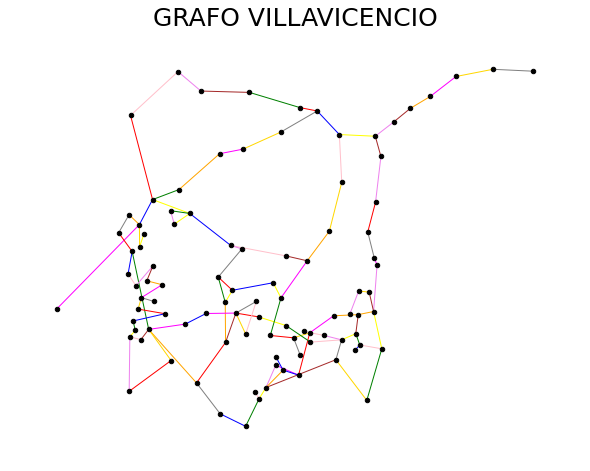

In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
edgelist = pd.read_csv('https://raw.githubusercontent.com/zeroxwx/PROYECTO/main/ARISTAS.csv')
edgelist.head(10)
nodelist = pd.read_csv('https://raw.githubusercontent.com/zeroxwx/PROYECTO/main/NODOS.csv')
nodelist.head(10)
g = nx.Graph()
for i, elrow in edgelist.iterrows():
  g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict())
for i, nlrow in nodelist.iterrows():
  g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
print(g.nodes)
print(nlrow)
list(g.edges(data=True))[0:5]
list(g.nodes(data=True))[0:10]

print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

node_positions = {nlrow[0]:(nlrow[1],-nlrow[2]) for i, nlrow in nodelist.iterrows()}
dict(list(node_positions.items())[0:5])


edge_colors = [edges['color'] for i, edges in edgelist.iterrows()]
edge_colors[0:10]
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=20, node_color='black')
plt.title('GRAFO VILLAVICENCIO', size=25)
plt.show()


In [ ]:
node_positions = {nlrow[0]:(nlrow[1],nlrow[2]) for i, nlrow in nodelist.iterrows()}
dict(list(node_positions.items())[0:12])

{'Séptima Brigada': (4.118116843477508, -73.61458912403519),
 'CasaToro Ford': (4.114619913254974, -73.63279699175433),
 'Los Fundadores': (4.122154949809774, -73.6422835607896),
 'Viva centro comercial': (4.125792401818582, -73.63807490724083),
 'Universidad Cooperativa de Colombia': (4.11602822157037, -73.60917047920013),
 'Polideportivo La Rosita': (4.114386941153814, -73.61129917718193),
 'Corporación Universitaria Autónoma de Nariño - AUNAR': (4.102981189098713,
  -73.59101828765516),
 'Clinica de Salud Mental-La Confraternidad': (4.112733712089341,
  -73.6074011195424),
 'Cancha Sintética Sport Light': (4.114877646712865, -73.60336264444985),
 'Nuestra Señora de Lourdes': (4.116065196778741, -73.60438525428209),
 'Polideportivo Doña Luz': (4.116734377264633, -73.60711576790234),
 'Librería & Papelería Popular': (4.114232118035488, -73.59852962561251)}

In [ ]:
edge_colors = [edges['color'] for i, edges in edgelist.iterrows()]
edge_colors[0:10]

['red',
 'blue',
 'green',
 'yellow',
 'pink',
 'violet',
 'brown',
 'orange',
 'magenta',
 'gold']

In [ ]:
nodes_odd_degree = [v for v, d in g.degree() if d % 2 ==1]
nodes_odd_degree[0:5]
print('Number of nodes of odd degree: {}'.format(len(nodes_odd_degree)))
print('Number of total nodes: {}'.format(len(g.nodes())))

Number of nodes of odd degree: 36
Number of total nodes: 99


In [ ]:
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))
odd_node_pairs[0:10]
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 630


In [ ]:
def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    distances = {}
    for pair in pairs:
        distances[pair] = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
    return distances

In [ ]:
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'distance')
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

{('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Cancha Sintética Sport Light'): 4,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Polideportivo Doña Luz'): 3,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Canchas sintéticas Gol de Yepes'): 10,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Parque Cavivir'): 11,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Parque Del Barrio Villa Samper'): 7,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'BARRIO ACAPULCO'): 5,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Parque Las Malocas - Catama'): 6,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Conjunto LlanoAlto'): 9,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Parque Pequeña Pony'): 10,
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'COMPLEJO DEPORTIVO BMX COVISAN'): 11}

In [ ]:
def create_complete_graph(pair_weights, flip_weights=True):
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], attr_dict={'distance': v, 'weight': wt_i})
    return g

In [ ]:
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

print('Number of nodes: {}'.format(len(g_odd_complete.nodes())))
print('Number of edges: {}'.format(len(g_odd_complete.edges())))

Number of nodes: 36
Number of edges: 630


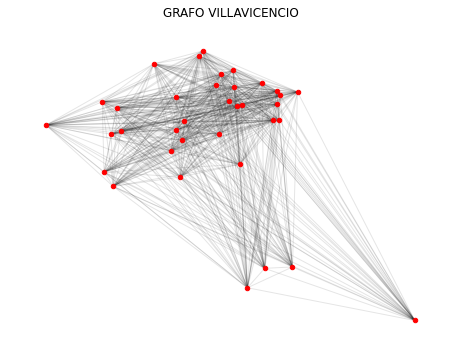

In [ ]:
plt.figure(figsize=(8, 6))
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('GRAFO VILLAVICENCIO')
plt.show()

In [ ]:
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 18


In [ ]:
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes]))
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))
odd_matching

Number of edges in matching (deduped): 18


[('COMPLEJO DEPORTIVO BMX COVISAN', 'Parque maracos'),
 ('Corporacion Hogar Elim', 'Parque Del Barrio Villa Samper'),
 ('Cancha Sintética Sport Light', 'Hiadica'),
 ('Campo Santo Papa Francisco - Misa Campal',
  'Colegio Marco Antonio Franco Rodriguez'),
 ('Hotel Italia', 'Parque Pequeña Pony'),
 ('ALTOS DE OKAVANGO', 'Accesorios la Bonita'),
 ('CHATARRERIA MINCHO', 'Parque Okavango'),
 ('Antiguo CAI vía Catama', 'Canchas sintéticas Gol de Yepes'),
 ('Cancha Sintetica Alzate', 'Parque Cavivir'),
 ('Francachela Pizza Parrilla', 'Villa Danny Villavicencio'),
 ('AKT MOTOS Y REPUESTOS ALKOSTO', 'Conjunto LlanoAlto'),
 ('Alimentos Concentrados Raza Centro De Distribucion',
  'Parque Las Malocas - Catama'),
 ('Delirio covisan', 'Hotel Deportivo y Recreativo Los Gemelos'),
 ('IMMUNOCAL@WMB2019', 'Parque Habitacional La Esmeralda'),
 ('BARRIO ACAPULCO', 'Grupo myl Empresarial Colombia - Villavicencio S.A.S'),
 ('Corporación Universitaria Autónoma de Nariño - AUNAR',
  'Fit Box Gym One - Gimans

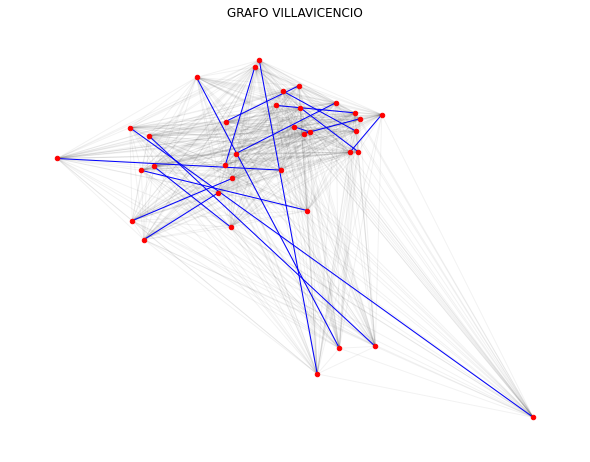

In [ ]:
plt.figure(figsize=(8, 6))

nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('GRAFO VILLAVICENCIO')
plt.show()

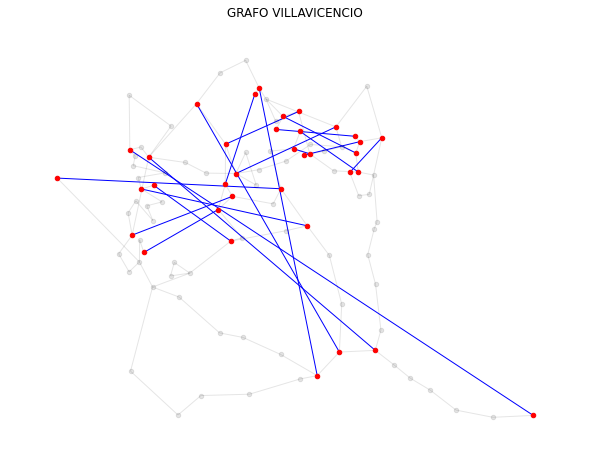

In [ ]:
plt.figure(figsize=(8, 6))

nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('GRAFO VILLAVICENCIO')
plt.show()

In [ ]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        graph_aug.add_edge(pair[0],
                           pair[1],
                           attr_dict={'distancia': nx.dijkstra_path_length(graph, pair[0], pair[1]),
                                      'sendero': 'augmented'}
                          )
    return graph_aug

In [ ]:
g_aug = add_augmenting_path_to_graph(g, odd_matching)

print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of edges in augmented graph: {}'.format(len(g_aug.edges())))

Number of edges in original graph: 115
Number of edges in augmented graph: 133


In [ ]:
pd.value_counts(g_aug.degree())

(Séptima Brigada, 4)                                                       1
(Centro Comercial Unicentro Villavicencio, 2)                              1
(AKT MOTOS Y REPUESTOS ALKOSTO, 4)                                         1
(Corporacion Universitaria De Colombia IDEAS, 2)                           1
(Monumento a las artes, 2)                                                 1
                                                                          ..
(Parque Pequeña Pony, 2)                                                   1
(Monumento flora de vida, 4)                                               1
(Conjunto LlanoAlto, 4)                                                    1
(Hotel Campestre El Campanario, 2)                                         1
(Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques, 2)    1
Length: 99, dtype: int64

In [ ]:
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source='Séptima Brigada'))
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 133


In [ ]:
naive_euler_circuit[0:55]

[('Séptima Brigada', 'Cancha Sintética Tiro Libre'),
 ('Cancha Sintética Tiro Libre',
  'Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques'),
 ('Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques',
  'CARNES LA PIEL ROJA'),
 ('CARNES LA PIEL ROJA', 'Cancha Sintética Tiro Libre'),
 ('Cancha Sintética Tiro Libre', 'Cancha Sintetica Alzate'),
 ('Cancha Sintetica Alzate', 'Terminal de Transportes de Villavicencio'),
 ('Terminal de Transportes de Villavicencio', 'Torres De La Pradera'),
 ('Torres De La Pradera', 'Hiadica'),
 ('Hiadica', 'Vida Sin Cancer'),
 ('Vida Sin Cancer', 'Fit Box Gym One - Gimansio de Crossfit'),
 ('Fit Box Gym One - Gimansio de Crossfit', 'FIGURADORA PANAMERICANA'),
 ('FIGURADORA PANAMERICANA', 'Polideportivo Barrio Morichal'),
 ('Polideportivo Barrio Morichal',
  'Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot'),
 ('Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot',
  'Polideportivo Bar

In [ ]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))
    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        #print(edge_data[0])
        if edge_data[0]['attr_dict']['sendero'] != 'augmented':
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att))
        else:
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='distance')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))

            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(aug_path)))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))

            # If `edge` does not exist in original graph, find the shortest path between its nodes and
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))

    return euler_circuit


In [ ]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g, 'Séptima Brigada')


Filling in edges for augmented edge: ('Accesorios la Bonita', 'ALTOS DE OKAVANGO')
Augmenting path: Accesorios la Bonita => Polideportivo Barrio Morichal => Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot => Cancha Arena Portales del Llano => ALTOS DE OKAVANGO
Augmenting path pairs: [('Accesorios la Bonita', 'Polideportivo Barrio Morichal'), ('Polideportivo Barrio Morichal', 'Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot'), ('Institucion Educativa Jorge Eliecer Gaitan Ayala Sede Atanacio Girardot', 'Cancha Arena Portales del Llano'), ('Cancha Arena Portales del Llano', 'ALTOS DE OKAVANGO')]

Filling in edges for augmented edge: ('Parque Habitacional La Esmeralda', 'IMMUNOCAL@WMB2019')
Augmenting path: Parque Habitacional La Esmeralda => OKAVANGO La Esmeralda => COMPLEJO DEPORTIVO BMX COVISAN => Monumento flora de vida => IMMUNOCAL@WMB2019
Augmenting path pairs: [('Parque Habitacional La Esmeralda', 'OKAVANGO La Esmeralda'), ('OKAVANGO L

In [ ]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 254


In [ ]:
## CPP Solution

# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 ('Séptima Brigada', 'Cancha Sintética Tiro Libre', {'attr_dict': {'sendero': 'w', 'distancia': 1.0, 'color': 'orange', 'estimate': 0}})
1 ('Cancha Sintética Tiro Libre', 'Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques', {'attr_dict': {'sendero': 'o', 'distancia': 0.55, 'color': 'green', 'estimate': 0}})
2 ('Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques', 'CARNES LA PIEL ROJA', {'attr_dict': {'sendero': 'o', 'distancia': 0.95, 'color': 'violet', 'estimate': 0}})
3 ('CARNES LA PIEL ROJA', 'Cancha Sintética Tiro Libre', {'attr_dict': {'sendero': '0', 'distancia': 0.55, 'color': 'yellow', 'estimate': 0}})
4 ('Cancha Sintética Tiro Libre', 'Cancha Sintetica Alzate', {'attr_dict': {'sendero': 'w', 'distancia': 1.1, 'color': 'magenta', 'estimate': 0}})
5 ('Cancha Sintetica Alzate', 'Terminal de Transportes de Villavicencio', {'attr_dict': {'sendero': 'g', 'distancia': 0.4, 'color': 'yellow', 'estimate': 0}})
6 ('Terminal de Transportes de Villavicenc

In [ ]:
# Computing some stats
total_mileage_of_circuit = sum([edge[2]['attr_dict']['distancia'] for edge in euler_circuit])
total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(g, 'distancia').values())
_vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
_vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

# Printing stats
print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))
#print('Percent of mileage retraced: {0:.2f}%\n'.format((1-total_mileage_of_circuit/total_mileage_on_orig_trail_map)*-100))

print('Number of edges in circuit: {}'.format(len(euler_circuit)))
print('Number of edges in original graph: {}'.format(len(g.edges())))
print('Number of nodes in original graph: {}\n'.format(len(g.nodes())))

print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(g.edges())))  

print('Number of times visiting each node:')
print(node_visits.to_string(index=False))

print('\nNumber of times visiting each edge:')
print(edge_visits.to_string(index=False))

Mileage of circuit: 228.08
Mileage on original trail map: 0.00
Mileage retracing edges: 228.08
Number of edges in circuit: 254
Number of edges in original graph: 115
Number of nodes in original graph: 99

Number of edges traversed more than once: 139

Number of times visiting each node:
 n_visits  n_nodes
        7        3
        6        6
        5        7
        4        6
        3       20
        2       21
        1       36

Number of times visiting each edge:
 n_visits  n_edges
        1       40
        2       39
        3       22
        5        7
        4        4
        6        2
        7        1


In [ ]:
def create_cpp_edgelist(euler_circuit):
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            cpp_edgelist[edge] = e
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1

    return list(cpp_edgelist.values())

In [ ]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

Number of edges in CPP edge list: 115


In [ ]:
cpp_edgelist[0:3]

[('Séptima Brigada',
  'Cancha Sintética Tiro Libre',
  {'attr_dict': {'sendero': 'w',
    'distancia': 1.0,
    'color': 'orange',
    'estimate': 0},
   'sequence': '0, 84, 107, 116, 125',
   'visits': 5}),
 ('Cancha Sintética Tiro Libre',
  'Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques',
  {'attr_dict': {'sendero': 'o',
    'distancia': 0.55,
    'color': 'green',
    'estimate': 0},
   'sequence': '1',
   'visits': 1}),
 ('Desgasificadora Y Taller De Soldaduras Metalmecanicas Tecnitanques',
  'CARNES LA PIEL ROJA',
  {'attr_dict': {'sendero': 'o',
    'distancia': 0.95,
    'color': 'violet',
    'estimate': 0},
   'sequence': '2',
   'visits': 1})]

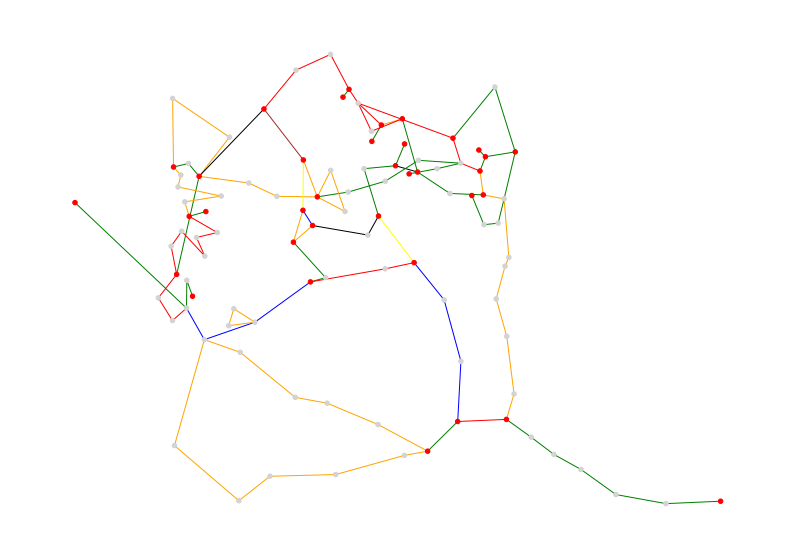

In [ ]:
g_cpp = nx.Graph(cpp_edgelist)

plt.figure(figsize=(14, 10))


visit_colors = {1:'orange', 2:'green', 3: 'red', 4 : 'black', 5 : 'blue', 6: 'yellow', 7 : 'brown', 8 : 'gold'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

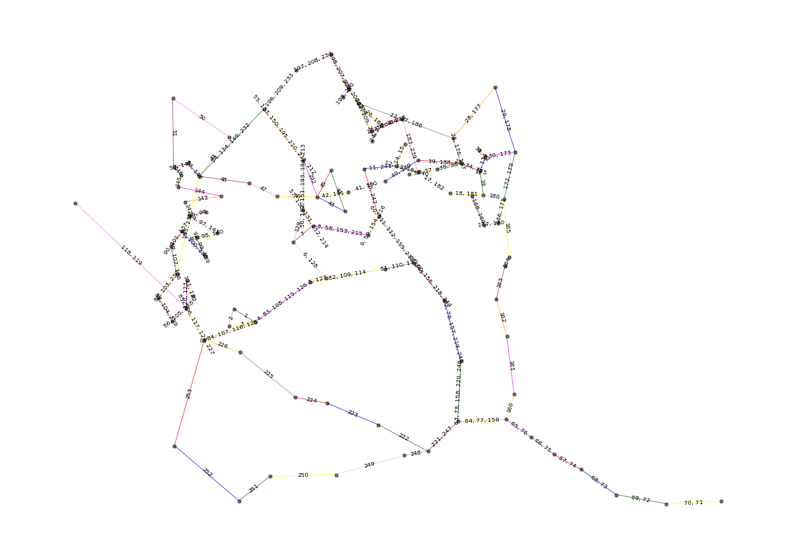

In [ ]:
plt.figure(figsize=(14, 10))

edge_colors = [e[2]['attr_dict']['color'] for e in g_cpp.edges(data=True)]
nx.draw_networkx(g_cpp, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, with_labels=False, alpha=0.5)

bbox = {'ec':[1,1,1,0], 'fc':[1,1,1,0]}  # hack to label edges over line (rather than breaking up line)
edge_labels = nx.get_edge_attributes(g_cpp, 'sequence')
nx.draw_networkx_edge_labels(g_cpp, pos=node_positions, edge_labels=edge_labels, bbox=bbox, font_size=6)

plt.axis('off')
plt.show()

In [ ]:
visit_colors = {1:'orange', 2:'green', 3: 'red', 4 : 'black', 5 : 'blue', 6: 'yellow', 7 : 'brown', 8 : 'gold'}
edge_cnter = {}
g_i_edge_colors = []
for i, e in enumerate(euler_circuit, start=1):

    edge = frozenset([e[0], e[1]])
    if edge in edge_cnter:
        edge_cnter[edge] += 1
    else:
        edge_cnter[edge] = 1

    # Full graph (faded in background)
    nx.draw_networkx(g_cpp, pos=node_positions, node_size=6, node_color='black', with_labels=False, alpha=0.07)

    # Edges walked as of iteration i
    euler_circuit_i = copy.deepcopy(euler_circuit[0:i])
    for i in range(len(euler_circuit_i)):
        edge_i = frozenset([euler_circuit_i[i][0], euler_circuit_i[i][1]])
        euler_circuit_i[i][2]['visits_i'] = edge_cnter[edge_i]
    g_i = nx.Graph(euler_circuit_i)
    g_i_edge_colors = [visit_colors[e[2]['visits_i']] for e in g_i.edges(data=True)]

    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='black', linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=g_i_edge_colors, alpha=0.8)

    plt.axis('off')
    plt.savefig('/content/drive/MyDrive/Datos II/gif/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()

In [ ]:
import glob
import numpy as np
import imageio
import os
import graphviz

def make_circuit_video(image_path, movie_filename, fps=7):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('/content/drive/MyDrive/Datos II/gif/','/content/drive/MyDrive/Datos II/cpp_route_animation.gif',fps=3)

